In [79]:
pip install -r ../requirements.txt > /dev/null

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


In [0]:
pip install job-offer-classifier --upgrade > /dev/null

In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
# default 

In [0]:
from os import path,listdir
from shutil import rmtree
import pandas as pd
import numpy as np
import job_offer_classifier
from job_offer_classifier.pipeline_classifier import Pipeline
from job_offer_classifier.validations import KFoldPipe
from job_offer_classifier.pipeline_classifier import plot_confusion_matrix

In [84]:
job_offer_classifier.__version__

'0.0.5'

In [0]:
# Shutdown TF info logging
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Balance the dataset

In [0]:
intekglobal_data = 'https://raw.githubusercontent.com/kikejimenez/ikg_employee_emails/master/data/interim/intekglobal_employee/emails.csv'
sibatel_web_data = 'https://raw.githubusercontent.com/kikejimenez/ikg_employee_emails/master/data/raw/sibatel_and_webpage.csv'
processed_data_file = './sibatel_web_intekglobal_emails/emails.csv'
models_dir = './sibatel_web_intekglobal_emails/estimator/'

In [96]:
path.isdir('sibatel_web_intekglobal_emails')

True

Cibatel+webpage

In [0]:
df = pd.read_csv(sibatel_web_data)
nb_cases = min([min(df.sentiment.value_counts().values),50])
df_pos = df[df.sentiment == 1].sample(nb_cases)
df_neg = df[df.sentiment == 0].sample(nb_cases)

df_sibatel_web = pd.concat([df_pos,df_neg]).sample(frac = 1)

Intekglobal

In [0]:
df = pd.read_csv(intekglobal_data)
df = df[(df.sentiment == 'positive') | (df.sentiment == 'negative')]
df.sentiment = df.sentiment.apply(lambda s: int(s == 'positive'))
df_intekglobal = df
del df

All

In [0]:
df = pd.concat([df_sibatel_web,df_intekglobal.drop('mocker',axis=1)]).sample(frac=1)
df.to_csv(processed_data_file)

In [100]:
df.sentiment.value_counts()

1    94
0    80
Name: sentiment, dtype: int64

In [0]:
kfp = KFoldPipe(n_splits = 4,src_file=processed_data_file)
kfp.train_steps = 1000

In [0]:
kfp.k_fold_validation()

In [103]:
kfp.best_seed

2489714844

In [0]:
kfp.random_state = kfp.best_seed
kfp.pipeline()

In [0]:
rmtree(models_dir,ignore_errors=True)
kfp.export_estimator(models_dir)

In [0]:
kfp = KFoldPipe(n_splits =1,src_file=processed_data_file,estimator_dir=models_dir)
kfp.load_estimator()
kfp.input_fns()

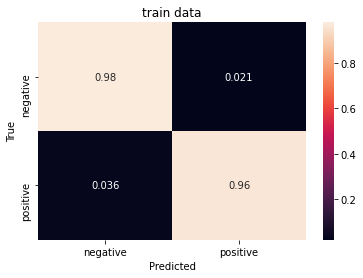

In [107]:
kfp.plot_confusion_matrix('train')

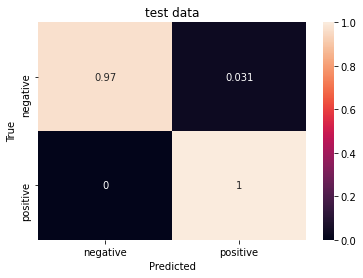

In [108]:
kfp.plot_confusion_matrix('test')

In [109]:
df_ex = kfp.dfs['test'].sample(5)
df_ex['prediction'] = kfp.predict(df_ex)

for k, r in df_ex.iterrows():
    print(k, sep='\n')
    print(
        r.payload.strip(),
        f'Expected: {r.sentiment}',
        f'Predicted: {r.prediction}',
        sep='\n'
    )

65
I have just enrolled in a Ph.D. program and can not apply for this job.
I will be glad to work with you in the future and look forward to meeting with you on another occasion.


Gabriela Romero
Expected: 0
Predicted: 0
169
i am delighted to formally accept the
offer, and i am very much looking forward to joining the team.
as discussed, my starting salary will be $7820, rising to $7820
following a successful probationary period of 3 months.
i can confirm that my starting date of employment will be May 01, 1974.
if there is any additional
information you need prior to this date, please let me know.
once again, thank you very much for the opportunity, and i look forward to working with you.
Expected: 1
Predicted: 1
82
Good day,


I would like to talk about this 
offer below that I saw in EmpleoNuevo page.
Please find my resume attached.
Ai, Machine Learning / Web Developing Position

I appreciate your attention to this email.

Thank you in advance!
Angeles Bayardo
Expected: 1
Predicted

The dataset consists of mock emails by the Intekglobal employees. 

Convert 'positive' and 'negative' values to 1 and 0 values, respectively.